# Rossmann Sales Projekt

### Von Jannik und Tyrone

##### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

##### In their first Kaggle competition, Rossmann is challenging you to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams! 

### Daten Laden

In [2]:
import pandas as pd

In [3]:
store_df = pd.read_csv('store.csv')
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

C:\Users\tyron\AppData\Local\Temp\ipykernel_11992\2716483640.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [4]:
merged_df = pd.merge(df, store_df, on='Store', how='left')
merged_df_test = pd.merge(df_test, store_df, on='Store', how='left')

### EDA Part 1 

In [5]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [7]:
merged_df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [8]:
merged_df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [9]:
merged_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [10]:
# Was ist der Unterschied zwischen ID und Store im Test-Dataframe?
print(merged_df_test['Store'].nunique())
merged_df_test['Id'].nunique()
# Anzahl der Unique ID's = Anzahl der Einträge

856


41088

### Resultat aus EDA Part 1: Erster Überblick über die gegebenen Datensätze, Datum muss zerpflückt werden, es gibt einige Null Werte, einige Spalten müssen noch in numerische Werte umgewandelt werden, Spalte "ID" im Testdataframe ist irrelevant

### Data Cleaning

In [11]:
# Ids vorher speichern, für Kaggle Submissions
df_test_ids = merged_df_test['Id']
merged_df_test.drop('Id', axis=1, inplace=True)

### Null Werte behandeln

In [12]:
merged_df["CompetitionDistance"].fillna(merged_df["CompetitionDistance"].mean(),inplace=True)
merged_df.fillna(-1, inplace=True)
merged_df_test["CompetitionDistance"].fillna(merged_df_test["CompetitionDistance"].mean(),inplace=True)
merged_df_test.fillna(-1, inplace=True)

##### Prüfen, ob jetzt alles gefüllt ist

In [13]:
merged_df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

##### Prüfen, ob jetzt alles gefüllt ist

In [14]:
merged_df_test.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Daten aus Date extrahieren

In [15]:
merged_df["Year"] = merged_df["Date"].str.slice(0, 4)
merged_df["Month"] = merged_df["Date"].str.slice(5, 7)
merged_df["Day"] = merged_df["Date"].str.slice(8, 10)
merged_df["Year"] = merged_df["Year"].astype("Int32")
merged_df["Month"] = merged_df["Month"].astype("Int32")
merged_df["Day"] = merged_df["Day"].astype("Int32")
merged_df.drop(columns=["Date"], inplace=True)

merged_df_test["Year"] = merged_df_test["Date"].str.slice(0, 4)
merged_df_test["Month"] = merged_df_test["Date"].str.slice(5, 7)
merged_df_test["Day"] = merged_df_test["Date"].str.slice(8, 10)
merged_df_test["Year"] = merged_df_test["Year"].astype("Int32")
merged_df_test["Month"] = merged_df_test["Month"].astype("Int32")
merged_df_test["Day"] = merged_df_test["Day"].astype("Int32")
merged_df_test.drop(columns=["Date"], inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder

### Fehlschlag: Ohne die folgenden Zeilen schlägt das kodieren fehl, weil die Datentypen innerhalb einer oder mehrerer Spalten uneinheitlich sind
merged_df["StateHoliday"] = merged_df["StateHoliday"].astype(str)
merged_df["StoreType"] = merged_df["StoreType"].astype(str)
merged_df["Assortment"] = merged_df["Assortment"].astype(str)
merged_df["PromoInterval"] = merged_df["PromoInterval"].astype(str)

merged_df_test["StateHoliday"] = merged_df_test["StateHoliday"].astype(str)
merged_df_test["StoreType"] = merged_df_test["StoreType"].astype(str)
merged_df_test["Assortment"] = merged_df_test["Assortment"].astype(str)
merged_df_test["PromoInterval"] = merged_df_test["PromoInterval"].astype(str)
###

columns_to_encode = ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]

label_encoder = LabelEncoder()

for column in columns_to_encode:   
    merged_df[column] = label_encoder.fit_transform(merged_df[column])
    merged_df_test[column] = label_encoder.fit_transform(merged_df_test[column])


## EDA Part 2

In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  int32  
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  int32  
 9   Assortment                 1017209 non-null  int32  
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 13  Promo2      

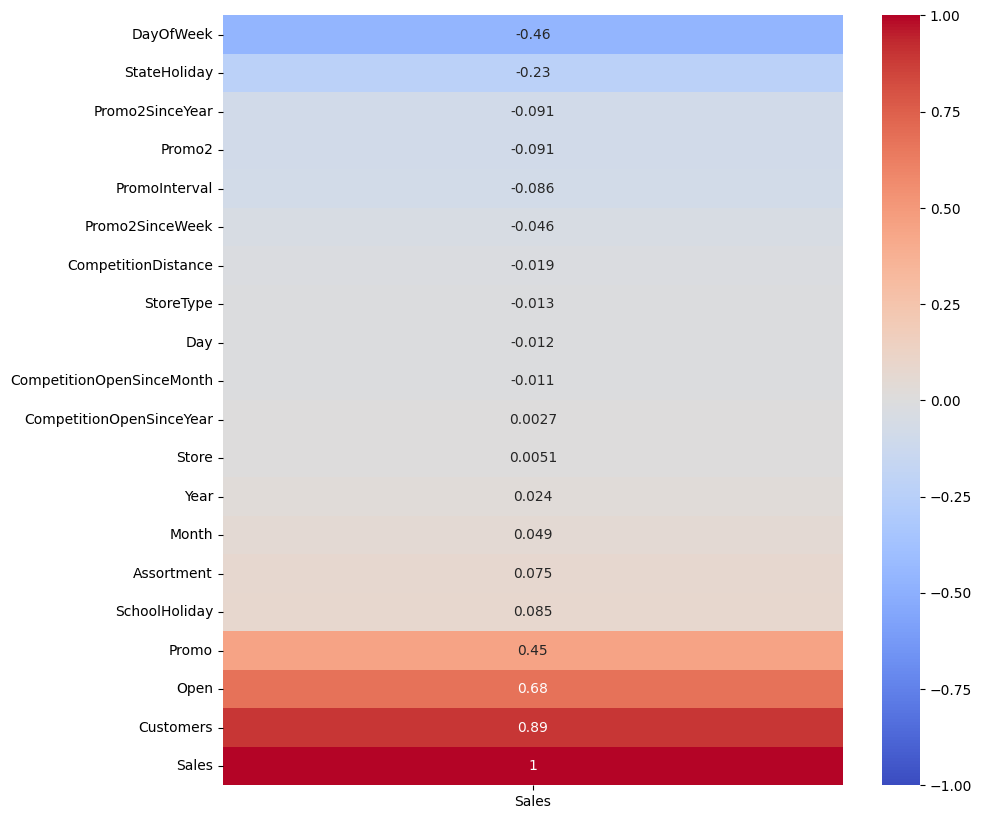

In [18]:
# Korrlationen anzeigen
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(merged_df.corr()[['Sales']].sort_values('Sales'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

### CompetitionOpenSinceMonth und CompetitionOpenSinceYear hatten beide sehr viele fehlende Werte und scheinen eher irrelevant, weshalb wir sie rauswerfen

In [19]:
# merged_df.drop(columns=["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"], inplace=True)
# merged_df_test.drop(columns=["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"], inplace=True)

### Das auslassen der Spalten wurde später verworfen, weil die feature importance vom Random Forest darauf hindeutet, dass diese Features doch relevant sind

In [20]:
merged_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,-1.0,-1.0,0,2015,7,31
1,2,5,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,2,2015,7,31
2,3,5,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,2,2015,7,31
3,4,5,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0,-1.0,-1.0,0,2015,7,31
4,5,5,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,-1.0,-1.0,0,2015,7,31


### Für erste Ansätze wurde geschaut, wie sich die Einkäufe über die Wochentage verteilen

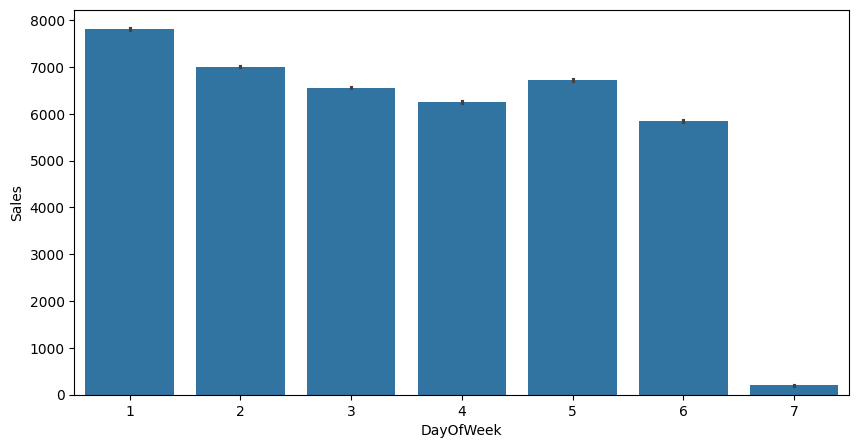

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x='DayOfWeek', y='Sales', data=merged_df)
plt.show()

### Überasschendes Ergebnis: Verkäufe am Sonntag, wie kann das sein? ---> siehe Finding 1

## Feature Engineering

In [22]:
# offenes Wochende Ja Nein Feature
def OpenWeekend(row):
    if (row['DayOfWeek'] == 6 or row['DayOfWeek'] == 7) and row['Open'] == 1:
        return 1
    else:
        return 0

merged_df['OpenWeekend'] = merged_df.apply(OpenWeekend, axis=1)
merged_df_test['OpenWeekend'] = merged_df_test.apply(OpenWeekend, axis=1)

In [23]:
# Feature hinzufügen, das angibt, ob es sich um einen offenen Feiertag handelt (Open=1 & StateHoliday=1 oder SchoolHoliday=1)
def OpenHoliday(row):
    if row["Open"] == 1 and (row["StateHoliday"] == 1 or row["SchoolHoliday"] == 1):
        return 1
    else:
        return 0

merged_df["OpenHoliday"] = merged_df.apply(OpenHoliday, axis=1)
merged_df_test["OpenHoliday"] = merged_df_test.apply(OpenHoliday, axis=1)

In [24]:
# Rossmann ist bals Drogerie zu den Feiertagen ein beliebtes Geschäft für Geschenke
# Deshalb schauen wir uns an, wie die Verkäufe zu den Weihnachtszeiten sind

def ChristmasTime(row):
    # Es wird zusätzlich nach Open=1 gefiltert, um beim Model fit ausreißer mit ChristmasTime=1 & Sales=0 zu vermeiden -> z.B. wenn an den Weihnachtstagen geschlossen ist
    if row['Month'] == 11: #and row['Open'] == 1:
        return 1
    elif row['Month'] == 12 and row['Day'] <= 26 and row['Open'] == 1:
        return 1
    else:
        return 0

merged_df['ChristmasTime'] = merged_df.apply(ChristmasTime, axis=1)
merged_df_test['ChristmasTime'] = merged_df_test.apply(ChristmasTime, axis=1)

#### Für das feature ChristmasTime wird zusätzlich nach Open=1 gefiltert, um beim Model fit ausreißer mit ChristmasTime=1 & Sales=0 zu vermeiden -> z.B. wenn an den Weihnachtstagen geschlossen ist

In [25]:
def GetQuarter(row):
    if row["Month"] <= 3:
        return 1
    elif row["Month"] <= 6:
        return 2
    elif row["Month"] <= 9:
        return 3
    else:
        return 4

merged_df["Quarter"] = merged_df.apply(GetQuarter, axis=1)
merged_df_test["Quarter"] = merged_df_test.apply(GetQuarter, axis=1)

## Feature importances

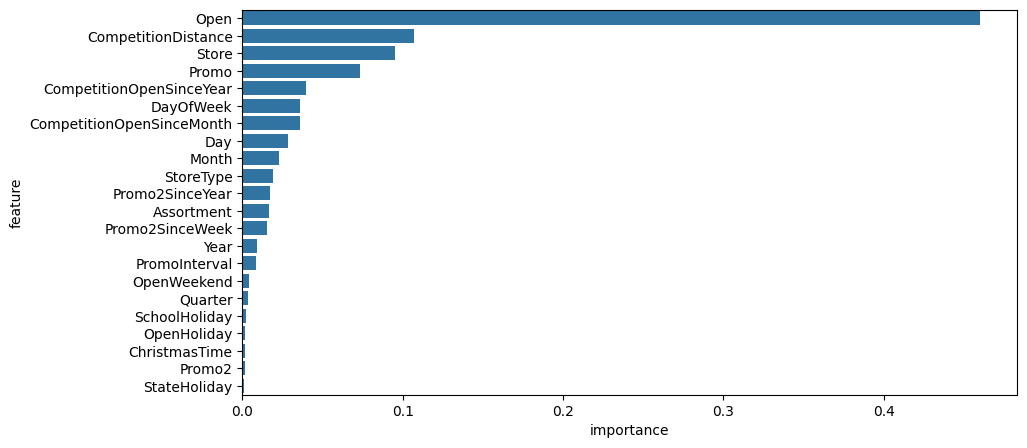

In [26]:
from sklearn.ensemble import RandomForestRegressor

X = merged_df.drop(columns=["Sales","Customers"])
y = merged_df["Sales"]

model = RandomForestRegressor(n_jobs=-1)
model.fit(X, y)

importances = model.feature_importances_
features = X.columns

feature_importances = pd.DataFrame({"feature": features, "importance": importances})
feature_importances = feature_importances.sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x="importance", y="feature", data=feature_importances)
plt.show()

##### Durch die feature importances wurde klar, dass zuvor ausgelassene Spalten (CompetitionOpenSinceMonth und CompetitionOpenSinceYear) doch bedeutungsvoll sind. Außerdem performen die eingebauten features nicht sehr gut, allerdings verbessern sie trotzdem das Modell

## Permutation importance

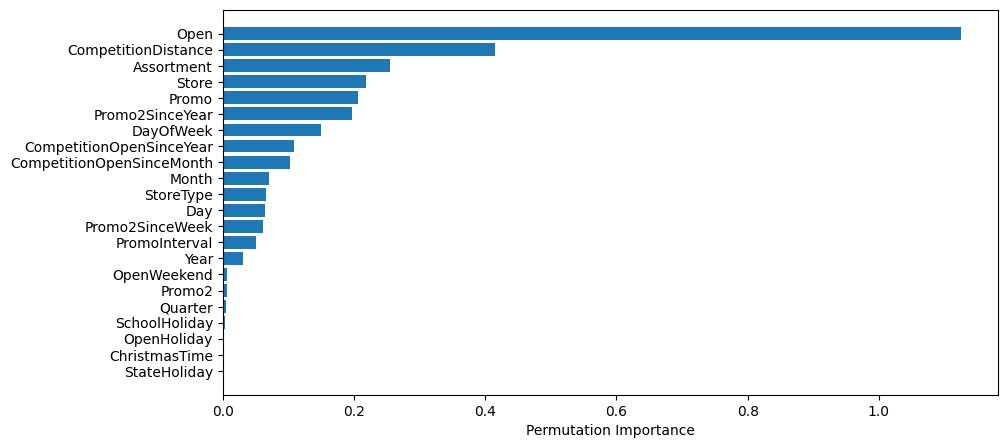

In [27]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=5)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

## Modelle

In [28]:
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = merged_df.drop('Sales', axis=1)

# Customers Spalte entfernen, weil es nicht Zielführend für die KI ist -> Es sollen ja ZUKÜNFTIGE Verkäufe vorhergesagt werden, dort wird die Anzahl der Kunden nicht bekannt sein
# Ein Denkansatz könnte sein eine KI zu bauen, die die Anzahl der Customers vorhersagt an einem tag vorhersagt, um es als Feature mit aufzunehmen und beim genaueren vorhersagen der Verkäufe zu unterstützen
X.drop('Customers', axis=1, inplace=True)
y = merged_df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sample = X_train[:100000]
y_train_sample = y_train[:100000]
X_test_sample = X_test[:100000]
y_test_sample = y_test[:100000]

## Neuronales Netzwerk Training mit Lernrate-Anpassung

Dieser Code trainiert ein neuronales Netz zum Predicten von Daten:

- **Zweck**: 
  - Das Ziel des Codes ist es, ein neuronales Netzwerk zu trainieren, das in der Lage ist, Vorhersagen zu treffen. 
  - Dabei wird die Lernrate des Netzwerks während des Trainings angepasst, um die Genauigkeit zu verbessern.

- **Was passiert**:
  - **Modelltraining**: Das Modell wird Schritt für Schritt mit Trainingsdaten verbessert.
  - **Lernraten-Anpassung**: Die Lernrate bestimmt, wie schnell das Modell lernt. Während des Trainings wird sie geändert, um die Leistung zu verbessern.

- **Warum ist das nützlich**:
  - Dieser Code ist nützlich, um ein einfaches neuronales Netzwerk für Vorhersageaufgaben zu trainieren.
  - Durch die Anpassung der Lernrate kann die Genauigkeit des Modells verbessert werden.



Training Neural Network:  83%|████████▎ | 83/100 [03:12<00:39,  2.32s/it]c:\Users\tyron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
Training Neural Network:  94%|█████████▍| 94/100 [03:36<00:13,  2.26s/it]c:\Users\tyron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
Training Neural Network: 100%|██████████| 100/100 [03:49<00:00,  2.30s/it]


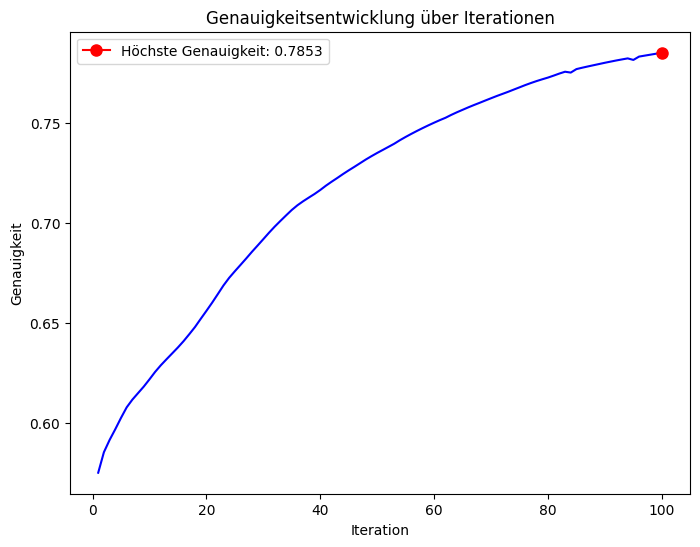

Höchste Genauigkeit: 0.7853 erreicht in Iteration 100


In [29]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

def NN(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    nn = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=100, random_state=42, solver='adam', alpha=0.0001, tol=1e-4, batch_size='auto')
    
    # Lernratenplaner-Parameter
    initial_lr = 0.001
    lr_decay = 0.9
    lr = initial_lr
    
    accuracies = []  # Um Genauigkeiten über Iterationen zu speichern
    
    # Fortschrittsüberwachung initialisieren
    progress_bar = tqdm(total=nn.max_iter, desc="Training Neural Network", position=0)

    highest_accuracy = 0.0  # Um die höchste Genauigkeit zu verfolgen
    iteration_with_highest_accuracy = 0  # Um die Iteration mit der höchsten Genauigkeit zu verfolgen

    for i in range(nn.max_iter):
        # Lernrate basierend auf dem Planer aktualisieren
        nn.learning_rate_init = lr
        
        # Training für eine Iteration
        nn.partial_fit(X_train_scaled, y_train)
        
        # Lernrate für die nächste Iteration aktualisieren
        lr *= lr_decay
        
        # Vorhersage
        y_pred = nn.predict(X_test_scaled)

        # Bewertung
        accuracy = r2_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        # Höchste Genauigkeit und dazugehörige Iteration aktualisieren
        if accuracy > highest_accuracy:
            highest_accuracy = accuracy
            iteration_with_highest_accuracy = i + 1
        
        progress_bar.update(1)

    progress_bar.close()

    # Genauigkeit über Iterationen plotten
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, nn.max_iter + 1), accuracies, color='blue')
    plt.plot(iteration_with_highest_accuracy, highest_accuracy, marker='o', markersize=8, color='red', label=f'Höchste Genauigkeit: {highest_accuracy:.4f}')
    plt.xlabel('Iteration')
    plt.ylabel('Genauigkeit')
    plt.title('Genauigkeitsentwicklung über Iterationen')
    plt.legend()
    plt.show()

    print(f"Höchste Genauigkeit: {highest_accuracy:.4f} erreicht in Iteration {iteration_with_highest_accuracy}")

# Beispiel-Nutzung:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
NN(X_train, X_test, y_train, y_test)


## Neuronales Netzwerk Training mit Anpassung der Lernrate und Embeddings

Dieser Code trainiert ein neuronales Netzwerk, um Vorhersagen zu treffen und verwendet Embeddings. Hier ist eine vereinfachte Erklärung:

- **Zweck**: 
  - Das Ziel des Codes ist es, ein neuronales Netzwerk zu trainieren, das Vorhersagen treffen kann. 
  - Während des Trainings wird die Lernrate des Netzwerks angepasst, um die Genauigkeit zu verbessern.
  - Außerdem werden Embeddings verwendet, um kategoriale Daten effizient darzustellen.

- **Was passiert**:
  - **Modelltraining**: Das Modell wird schrittweise verbessert, indem es mit Trainingsdaten trainiert wird.
  - **Lernraten-Anpassung**: Die Lernrate, die bestimmt, wie schnell das Modell lernt, wird im Laufe des Trainings geändert, um die Leistung zu verbessern.
  - **Embeddings**: Embeddings sind eine Technik, um kategoriale Daten in einem neuronalen Netzwerk zu repräsentieren. Sie helfen dem Netzwerk dabei, kategoriale Informationen besser zu verstehen, indem sie die Daten in einem mehrdimensionalen Raum abbilden.

- **Warum ist das nützlich**:
  - Dieser Code ist nützlich, um ein neuronales Netzwerk zu trainieren, das Vorhersagen treffen kann, selbst wenn die Daten kategoriale Variablen enthalten.
  - Die Verwendung von Embeddings kann dazu beitragen, die Leistung des Netzwerks zu verbessern, indem sie komplexe Beziehungen zwischen den kategorialen Daten erfassen.




In [ ]:
import matplotlib.pyplot as plt
from keras.layers import Input, Embedding, Flatten, concatenate, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

def NN_embedding(X_train, X_test, y_train, y_test, epochs=50, batch_size=32):
    # Daten in numerische und kategoriale aufteilen
    numerical_train = X_train.select_dtypes(include=['int64', 'float64'])
    categorical_train = X_train.select_dtypes(include=['object'])

    numerical_test = X_test.select_dtypes(include=['int64', 'float64'])
    categorical_test = X_test.select_dtypes(include=['object'])

    # Numerische Daten normalisieren
    scaler = StandardScaler()
    numerical_train = scaler.fit_transform(numerical_train)
    numerical_test = scaler.transform(numerical_test)

    # Kategoriale Daten one-hot encoden, falls vorhanden
    if not categorical_train.empty:
        categorical_train = pd.get_dummies(categorical_train)
        categorical_test = pd.get_dummies(categorical_test)

        # Numerische und kategoriale Daten kombinieren
        X_train = np.concatenate([numerical_train, categorical_train.to_numpy()], axis=1)
        X_test = np.concatenate([numerical_test, categorical_test.to_numpy()], axis=1)
    else:
        # Wenn keine kategorialen Spalten vorhanden sind, nur numerische Daten verwenden
        X_train = numerical_train
        X_test = numerical_test

    # Modell definieren
    numerical_inputs = Input(shape=(numerical_train.shape[1],))
    categorical_inputs = Input(shape=(categorical_train.shape[1],))

    # Embedding-Schichten für die kategorialen Daten
    embedding_layers = []
    for i in range(categorical_train.shape[1]):
        input_dim = categorical_train.iloc[:, i].nunique()
        embedding_dim = min(50, input_dim // 2)
        embedding_layers.append(Embedding(input_dim=input_dim, output_dim=embedding_dim)(categorical_inputs[:, i]))

    # Embedding-Schichten flatten
    embedding_layers = [Flatten()(embedding) for embedding in embedding_layers]

    # Numerische und flatten Embedding-Schichten concatenieren
    if not categorical_train.empty:
        x = concatenate([numerical_inputs] + embedding_layers)
    else:
        x = numerical_inputs

    # Vollständig verbundene Schicht hinzufügen
    x = Dense(100, activation='relu')(x)

    # Ausgabeschicht hinzufügen
    output = Dense(1)(x)

    # Modell erstellen
    model = Model(inputs=[numerical_inputs, categorical_inputs], outputs=output)

    # Modell kompilieren
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

    # Frühstopp-Callback definieren
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Modell mit Frühstopp trainieren
    history = model.fit([numerical_train, categorical_train.to_numpy()], y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])

    # Modell evaluieren
    _, accuracy = model.evaluate([numerical_test, categorical_test.to_numpy()], y_test)

    return accuracy

# Beispieldaten verwenden, um die Wartezeit zu reduzieren
X_train_sample = X_train[:100000]
y_train_sample = y_train[:100000]
X_test_sample = X_test[:100000]
y_test_sample = y_test[:100000]

epochs_list = [10, 25, 50, 100, 150]
batch_sizes = [32, 16]

accuracy_scores = []
best_accuracy = 0
best_combination = None

for epochs in epochs_list:
    for batch_size in batch_sizes:
        print(f"Epochen: {epochs}, Batch-Größe: {batch_size}")
        accuracy = NN_embedding(X_train_sample, X_test_sample, y_train_sample, y_test_sample, epochs=epochs, batch_size=batch_size)
        accuracy_scores.append((epochs, batch_size, accuracy))
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combination = (epochs, batch_size)

print(f"Beste Genauigkeit: {best_accuracy} bei Epochen: {best_combination[0]} und Batch-Größe: {best_combination[1]}")

# Genauigkeitsergebnisse plotten
plt.figure(figsize=(10, 6))
for batch_size in batch_sizes:
    batch_size_scores = [(epochs, acc) for epochs, bs, acc in accuracy_scores if bs == batch_size]
    epochs, scores = zip(*batch_size_scores)
    plt.plot(epochs, scores, label=f'Batch-Größe {batch_size}')

plt.scatter(best_combination[0], best_accuracy, color='red', label=f'Beste Kombination: {best_combination}', zorder=5)
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')
plt.title('Genauigkeit vs. Epochen für verschiedene Batch-Größen mit Frühstopp')
plt.legend()
plt.grid(True)
plt.show()


## Misserfolg des Embedding NN 
Nach mehreren Versuchen und Experimenten im Projekt haben wir festgestellt, dass wir Schwierigkeiten hatten, Embeddings effektiv in unser neuronales Netzwerk zu integrieren und damit ein zufriedenstellendes Ergebnis zu erzielen. Trotz der vielversprechenden Möglichkeit, kategoriale Daten mit Embeddings zu repräsentieren und dadurch die Leistung des Netzwerks zu verbessern, konnten wir keine signifikante Verbesserung der Vorhersagegenauigkeit erreichen.

Dieser Misserfolg wird auch deutlich, wenn man den Graphen betrachtet, der die Genauigkeit in Abhängigkeit von den Epochen für verschiedene Batch-Größen zeigt. Die Kurven zeigen keine klare Tendenz zu einer Verbesserung der Genauigkeit über die Epochen hinweg, was darauf hinweist, dass das Embedding-Modell keine guten Ergebnisse erzielt hat

## KNN

In [ ]:
def KNN(X_train, X_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsRegressor

    knn = KNeighborsRegressor(n_neighbors=5, weights="distance",algorithm="ball_tree", n_jobs=-1)
    knn.fit(X_train, y_train)
    return knn
    y_pred = knn.predict(X_test)

    print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")

# KNN(X_train_sample, X_test_sample, y_train_sample, y_test_sample)

## Decision Tree

In [ ]:
def DT(X_train, X_test, y_train, y_test):
    from sklearn.tree import DecisionTreeRegressor

    dt = DecisionTreeRegressor(max_depth=None, min_samples_leaf=4, min_samples_split=10, splitter='best', random_state=42)
    dt.fit(X_train, y_train)
    return dt
    y_pred = dt.predict(X_test)

    print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")

# DT(X_train, X_test, y_train, y_test)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
def RF(X_train, X_test, y_train, y_test):

    rf = RandomForestRegressor(random_state=42,n_jobs=-1,max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
    rf.fit(X_train, y_train)
    return rf
    y_pred = rf.predict(X_test)

    print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")

# RF(X_train, X_test, y_train, y_test)

## Ada boost

In [ ]:
# Ada boost -> Performance ist nicht so gut, also nicht Teil des Votings
from sklearn.ensemble import AdaBoostRegressor
def Ada(X_train, X_test, y_train, y_test):
    ada = AdaBoostRegressor(random_state=42, n_estimators=300, learning_rate=0.01)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)

    print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")

# Ada(X_train, X_test, y_train, y_test)

## Gradient boost

In [ ]:
# Gradient Boost
from sklearn.ensemble import GradientBoostingRegressor
def GB(X_train, X_test, y_train, y_test):
    gb = GradientBoostingRegressor(random_state=42, n_estimators=300, learning_rate=0.1, max_depth=8)
    gb.fit(X_train, y_train)
    return gb
    y_pred = gb.predict(X_test)

    print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")

# GB(X_train_sample, X_test_sample, y_train_sample, y_test_sample)

## XGBoost

In [ ]:
# XGBoost
import xgboost as xgb
def XGB(X_train, X_test, y_train, y_test):
    xg_reg = xgb.XGBRegressor(learning_rate=0.1, max_depth=8, n_estimators=300, random_state=42, n_jobs=-1)
    xg_reg.fit(X_train,y_train)
    return xg_reg
    y_pred = xg_reg.predict(X_test)

    print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")
# XGB(X_train, X_test, y_train, y_test)

# Accuracy: 0.94888
# RMSE: 869.479396084539

## SVM

In [ ]:
# Support Vector machine
from sklearn.svm import SVR
def SVM(X_train, X_test, y_train, y_test):
    svr = SVR(kernel="rbf", C=1, epsilon=0.1)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)

    print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")

# SVM(X_train_sample, X_test_sample, y_train_sample, y_test_sample)
# Ergebnis extrem schlecht, daher nicht weiter betrachtet

## Logistic regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LinearRegression
def LR(X_train, X_test, y_train, y_test):
    lr = LinearRegression(n_jobs=-1)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
    print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")

# LR(X_train, X_test, y_train, y_test)

## Modelloptimierung

In [ ]:
# KNN = 1
# Gradient Boost = 2
# Decision Tree = 3
# Random Forest = 4
# XG Boost = 5
optimize = 0

## KNN Optimizer

In [ ]:
if optimize == 1:
    from sklearn.neighbors import KNeighborsRegressor
    from tqdm import tqdm
    from sklearn.model_selection import GridSearchCV
    from tqdm import tqdm
    tqdm.pandas()

    knn = KNeighborsRegressor()
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['ball_tree'],
        'leaf_size': [10, 20, 30]
    }

    grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)

    with tqdm(total=len(param_grid['n_neighbors']) * len(param_grid['weights']) * len(param_grid['algorithm']) * len(param_grid['leaf_size'])) as pbar:
        for n_neighbors in param_grid['n_neighbors']:
            for weights in param_grid['weights']:
                for algorithm in param_grid['algorithm']:
                    for leaf_size in param_grid['leaf_size']:
                        grid_search.fit(X_train_sample, y_train_sample)
                        pbar.update(1)

    print(grid_search.best_params_)
    print(grid_search.best_score_)

100%|██████████| 24/24 [08:53<00:00, 22.23s/it]

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}
0.43331223882376896


## Gradient Boost Optimizer

In [ ]:
if optimize == 2:
    gb = GradientBoostingRegressor()
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 8]
    }
    grid_search = GridSearchCV(gb, param_grid, cv=5, n_jobs=-1)

    with tqdm(total=len(param_grid['n_estimators']) * len(param_grid['learning_rate']) * len(param_grid['max_depth'])) as pbar:
        for n_estimators in param_grid['n_estimators']:
            for learning_rate in param_grid['learning_rate']:
                for max_depth in param_grid['max_depth']:
                    grid_search.fit(X_train_sample, y_train_sample)
                    pbar.update(1)

    print(grid_search.best_params_)
    print(grid_search.best_score_)

## Decision Tree Optimizer

In [ ]:
if optimize == 3:
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.model_selection import GridSearchCV

    dt = DecisionTreeRegressor()
    param_grid = {
        'max_depth': [None, 3, 5, 8],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4, 8, 12],
        'splitter' : ['best', 'random'],
        'random_state': [42]
    }
    grid_search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)
    
    with tqdm(total=len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf'])) as pbar:
        for max_depth in param_grid['max_depth']:
            for min_samples_split in param_grid['min_samples_split']:
                for min_samples_leaf in param_grid['min_samples_leaf']:
                    for splitter in param_grid['splitter']:
                        grid_search.fit(X_train_sample, y_train_sample)
                        pbar.update(1)

    print(grid_search.best_params_)
    print(grid_search.best_score_)

## Random Forest Optimizer

In [ ]:
if optimize == 4:
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import GridSearchCV
    from tqdm import tqdm

    rf = RandomForestRegressor()
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 3, 5, 8],
        'min_samples_split': [2, 5, 10 ],
        'min_samples_leaf': [1, 2, 4, 8, 12],
        'random_state': [42],
        'n_jobs': [-1]
    }
    grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

    with tqdm(total=len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf'])) as pbar:
        for n_estimators in param_grid['n_estimators']:
            for max_depth in param_grid['max_depth']:
                for min_samples_split in param_grid['min_samples_split']:
                    for min_samples_leaf in param_grid['min_samples_leaf']:
                        grid_search.fit(X_train_sample, y_train_sample)
                        pbar.update(1)

    print(grid_search.best_params_)
    print(grid_search.best_score_)

## XGBoost Optimizer

In [ ]:
if optimize == 5:
    import xgboost as xgb
    from sklearn.model_selection import GridSearchCV
    from tqdm import tqdm

    xg_reg = xgb.XGBRegressor()
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 8]
    }
    grid_search = GridSearchCV(xg_reg, param_grid, cv=5, n_jobs=-1)

    with tqdm(total=len(param_grid['n_estimators']) * len(param_grid['learning_rate']) * len(param_grid['max_depth'])) as pbar:
        for n_estimators in param_grid['n_estimators']:
            for learning_rate in param_grid['learning_rate']:
                for max_depth in param_grid['max_depth']:
                    grid_search.fit(X_train_sample, y_train_sample)
                    pbar.update(1)

    print(grid_search.best_params_)
    print(grid_search.best_score_)

## Voting Verfahren

### Es wurden die besten Verfahren gewählt, näher angeschaut und in ein Voting Ensemble integriert

In [ ]:
# Mode 0 = Nicht Trainieren, Mode 1 = Trainieren, Mode 2 = Kaggle Submission
submission = 1
sample_size = 0

# Voting verfahren
from sklearn.ensemble import VotingRegressor
def VR(X_train, X_test, y_train, y_test, submission):
    knn = KNN(X_train, X_test, y_train, y_test)
    dt = DT(X_train, X_test, y_train, y_test)
    rf = RF(X_train, X_test, y_train, y_test)
    gb = GB(X_train, X_test, y_train, y_test)
    xgb = XGB(X_train, X_test, y_train, y_test)

    vr = VotingRegressor(estimators=[('knn', knn), ('dt', dt), ('rf', rf), ('gb', gb), ('xgb', xgb)])
    vr.fit(X_train, y_train)

    if submission == 1:
        y_pred = vr.predict(X_test)

        print(f"Accuracy: {r2_score(y_test, y_pred):.5f}")
        print(f"RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")
    elif submission == 2:
        y_pred = vr.predict(merged_df_test)
        output = pd.DataFrame()
        output['Id'] = df_test_ids
        output['Sales'] = y_pred
        output.set_index('Id', inplace=True)
        output.to_csv('submission_neu.csv', sep=',', index=True)

if submission!=0:
    if sample_size == 1:
        VR(X_train_sample, X_test_sample, y_train_sample, y_test_sample, submission)
    else:
        VR(X_train, X_test, y_train, y_test, submission)

print("End")